# Synthetic Anomaly Dataset

In [20]:
from typing import NoReturn, Any, Dict, Union, List

import numpy as np

from timeatlas.abstract import AbstractBaseModel
from timeatlas import TimeSeriesDataset, TimeSeries

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Subset

from timeatlas.models.NN.dataset import TimeSeriesClassificationDataset
from timeatlas.models.NN.dataloader import BaseDataLoader

import matplotlib.pyplot as plt


In [2]:
class CNNClassification(TimeSeriesClassificationDataset):

    def __init__(self, timeseriesdataset: TimeSeriesDataset):
        super(CNNClassification, self).__init__(timeseriesdataset=timeseriesdataset)

        self.data = np.array([ts.series['values'] for ts in timeseriesdataset])
        self.labels = np.array([ts.label for ts in timeseriesdataset])

        self.label_key = self.create_label_key()

        self.num_classes = len(self.label_key)

        self.labels = self.class_to_num()

    def create_label_key(self):
        class_names = np.array(list(set(self.labels)))

        label_key = {}
        for k, v in enumerate(class_names):
            label_key[v] = k

        return label_key

    def class_to_num(self):
        labels = []
        for i, label in enumerate(self.labels):
            labels.append(self.label_key[label])

        return np.array(labels)

In [3]:
class CNNClassifier(nn.Module, AbstractBaseModel):

    def __init__(self, n_classes: int):
        super(CNNClassifier, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=1, out_channels=50, kernel_size=2)
        self.pool = nn.MaxPool1d(2, 2)
        self.conv2 = nn.Conv1d(in_channels=50, out_channels=25, kernel_size=2)
        self.conv3 = nn.Conv1d(in_channels=25, out_channels=10, kernel_size=2)
        self.fc1 = nn.Linear(110, 60)
        self.fc2 = nn.Linear(60, 15)
        self.fc3 = nn.Linear(15, n_classes)

    def forward(self, x):
        #print(f'shape at start: {x.shape}')
        x = F.relu(self.conv1(x))
        #print(f'shape after conv1: {x.shape}')
        x = self.pool(x)
        #print(f'shape after pool1: {x.shape}')
        x = F.relu(self.conv2(x))
        #print(f'shape after conv2: {x.shape}')
        x = self.pool(x)
        #print(f'shape after pool2: {x.shape}')
        x = F.relu(self.conv3(x))
        #print(f'shape after conv3: {x.shape}')
        x = self.pool(x)
        #print(f'shape after pool3: {x.shape}')
        x = x.view(x.size(0), -1)
        #print(f'shape after view: {x.shape}')
        x = F.relu(self.fc1(x))
        #print(f'shape after fc1: {x.shape}')
        x = F.relu(self.fc2(x))
        #print(f'shape after fc2: {x.shape}')
        x = self.fc3(x)
        #print(f'shape after fc3: {x.shape}')

        return x

    def fit(self, series) -> NoReturn:
        pass

    def predict(self, horizon) -> Any:
        pass

In [4]:
class CNNLSTMClassifier(nn.Module, AbstractBaseModel):

    def __init__(self, hidden_dim: int , layer_dim: int, n_classes: int):
        super(CNNLSTMClassifier, self).__init__()
        
        self.n_classes = n_classes
        self.layer_dim = layer_dim
        self.hidden_dim = hidden_dim

        self.conv1 = nn.Conv1d(in_channels=1, out_channels=50, kernel_size=2)
        self.pool = nn.MaxPool1d(2, 2)
        self.conv2 = nn.Conv1d(in_channels=50, out_channels=25, kernel_size=2)
        #self.conv3 = nn.Conv1d(in_channels=25, out_channels=10, kernel_size=2)
        
        self.rnn = nn.LSTM(24, hidden_dim, layer_dim, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim, n_classes)

    def forward(self, x):
        h0, c0 = self.init_hidden(x)
        #print(f'shape at start: {x.shape}')
        x = F.relu(self.conv1(x))
        #print(f'shape after conv1: {x.shape}')
        x = self.pool(x)
        #print(f'shape after pool1: {x.shape}')
        x = F.relu(self.conv2(x))
        #print(f'shape after conv2: {x.shape}')
        x = self.pool(x)
        #print(f'shape after pool2: {x.shape}')
        #x = F.relu(self.conv3(x))
        #print(f'shape after conv3: {x.shape}')
        #x = self.pool(x)
        #print(f'shape after pool3: {x.shape}')
        x, (hn, cn) = self.rnn(x, (h0, c0))
        #print(f'shape after rnn: {x.shape}')
        x = self.fc1(x[:, -1, :])
        #print(f'shape after linear1: {x.shape}')
        return x
    
    
    def init_hidden(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).double()
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).double()
        return (h0, c0)


    def fit(self, series) -> NoReturn:
        pass

    def predict(self, horizon) -> Any:
        pass

In [5]:
from timeatlas.read_write import read_pickle, read_tsd
import torch.optim as optim

### Loading Data and Scaling

In [32]:
tsd = read_pickle('../data/sine_data_test.pkl')


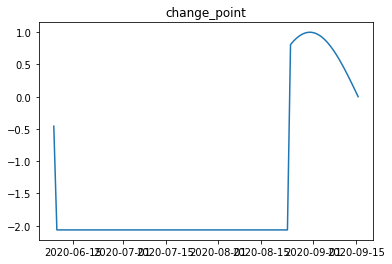

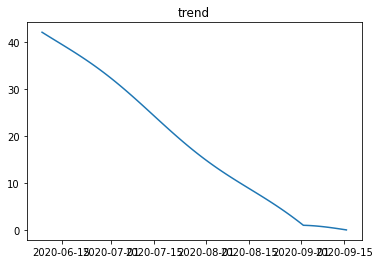

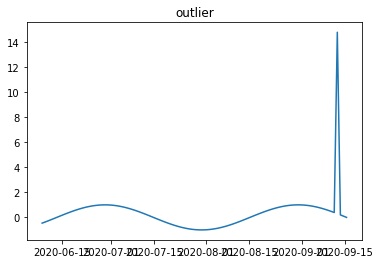

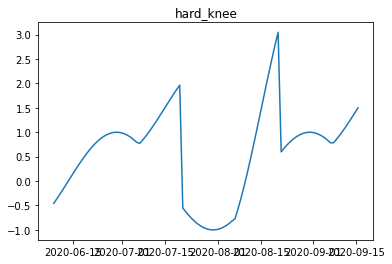

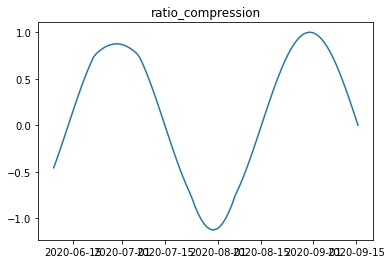

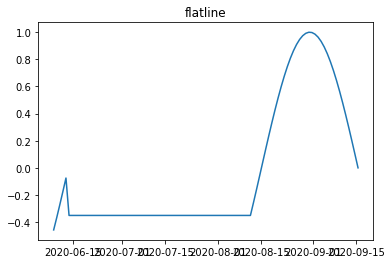

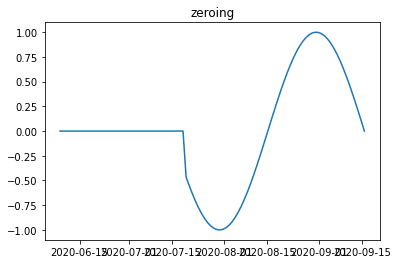

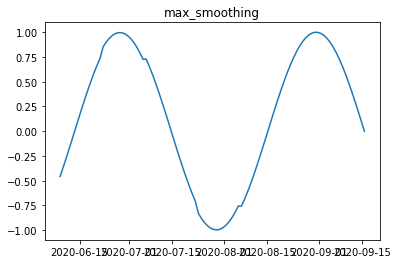

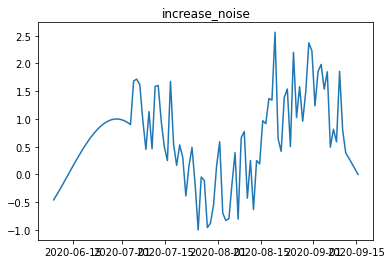

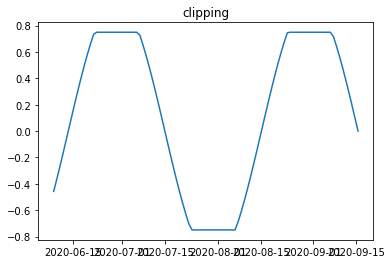

In [33]:
plt.plot(tsd[1].series)
plt.title(tsd[1].label)
plt.show()

plt.plot(tsd[11].series)
plt.title(tsd[11].label)
plt.show()

plt.plot(tsd[21].series)
plt.title(tsd[21].label)
plt.show()

plt.plot(tsd[31].series)
plt.title(tsd[31].label)
plt.show()

plt.plot(tsd[41].series)
plt.title(tsd[41].label)
plt.show()

plt.plot(tsd[51].series)
plt.title(tsd[51].label)
plt.show()

plt.plot(tsd[61].series)
plt.title(tsd[61].label)
plt.show()

plt.plot(tsd[81].series)
plt.title(tsd[81].label)
plt.show()

plt.plot(tsd[91].series)
plt.title(tsd[91].label)
plt.show()

plt.plot(tsd[101].series)
plt.title(tsd[101].label)
plt.show()


In [ ]:
from timeatlas.processors import Scaler

In [ ]:
scaler = Scaler()

In [ ]:
for i,ts in enumerate(tsd):
    tsd[i].series = scaler.minmax(ts.series)

In [ ]:
tsd.to_pickle('../data/sine_data_test_scaled.pkl')

### Load Scaled TSD

In [6]:
tsd = read_pickle('../data/sine_data_test_scaled.pkl')

In [7]:
len(tsd.data)

110000

Testing the data and labels

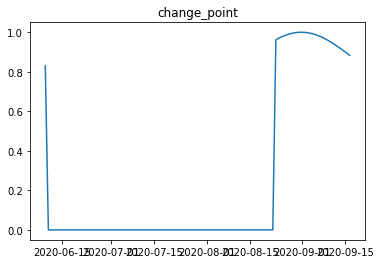

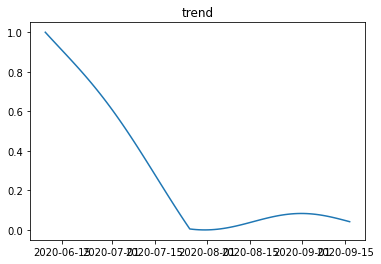

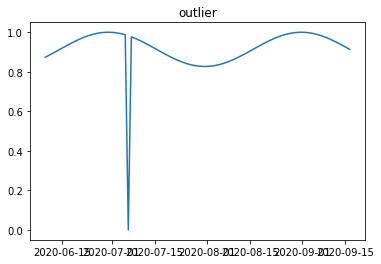

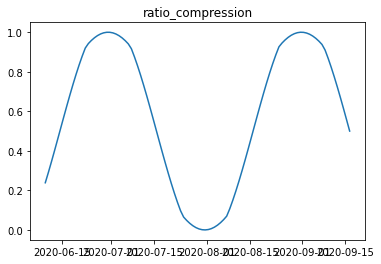

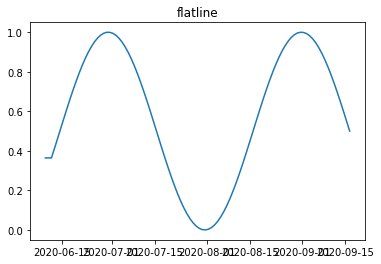

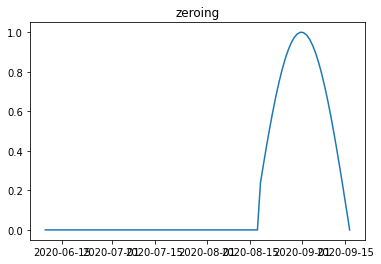

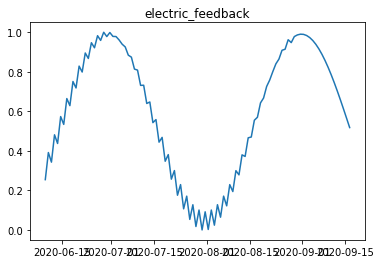

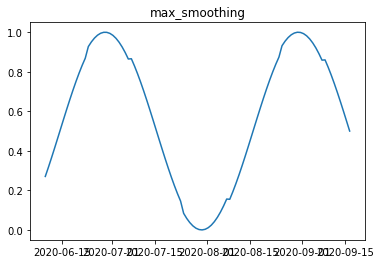

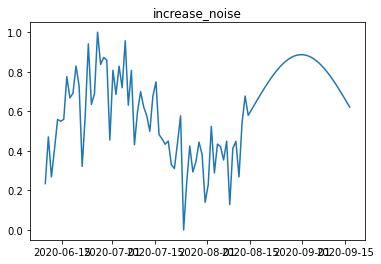

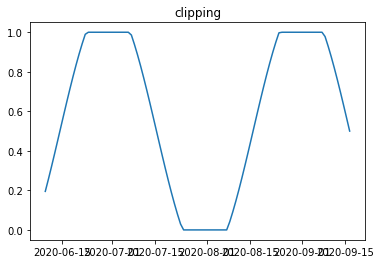

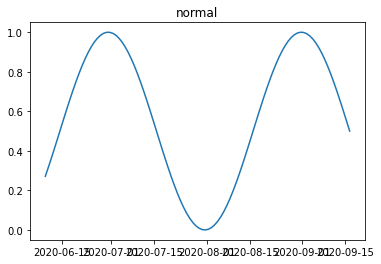

In [8]:
plt.plot(tsd[1].series)
plt.title(tsd[1].label)
plt.show()

plt.plot(tsd[10001].series)
plt.title(tsd[10001].label)
plt.show()

plt.plot(tsd[20001].series)
plt.title(tsd[20001].label)
plt.show()

plt.plot(tsd[30001].series)
plt.title(tsd[30001].label)
plt.show()

plt.plot(tsd[40001].series)
plt.title(tsd[40001].label)
plt.show()

plt.plot(tsd[50001].series)
plt.title(tsd[50001].label)
plt.show()

plt.plot(tsd[60001].series)
plt.title(tsd[60001].label)
plt.show()

plt.plot(tsd[70001].series)
plt.title(tsd[70001].label)
plt.show()

plt.plot(tsd[80001].series)
plt.title(tsd[80001].label)
plt.show()

plt.plot(tsd[90001].series)
plt.title(tsd[90001].label)
plt.show()

plt.plot(tsd[100001].series)
plt.title(tsd[100001].label)
plt.show()


### Learning

In [10]:
batch_size = 1000
shuffle = True

In [11]:
dataset = CNNClassification(timeseriesdataset=tsd)

In [18]:
dataset_size = len(dataset)
indices = list(range(dataset_size))
random_seed = 1
validation_split = .2
split = int(np.floor(validation_split * dataset_size))
if shuffle:
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

In [21]:
dataset_train = Subset(dataset, train_indices)
dataset_val = Subset(dataset, val_indices)

In [22]:
len(dataset_train)

88000

In [23]:
len(dataset_val)

22000

In [28]:
dataloader_train = BaseDataLoader(dataset=dataset_train,
                                  batch_size=batch_size,
                                  shuffle=shuffle)

In [29]:
dataloader_val = BaseDataLoader(dataset=dataset_val,
                                batch_size=1,
                                shuffle=shuffle)

In [30]:
net = CNNLSTMClassifier(hidden_dim=25, layer_dim=2, n_classes=dataset.num_classes).double()


In [31]:
net

CNNLSTMClassifier(
  (conv1): Conv1d(1, 50, kernel_size=(2,), stride=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(50, 25, kernel_size=(2,), stride=(1,))
  (rnn): LSTM(24, 25, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=25, out_features=11, bias=True)
)

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [34]:
correct = 0
total = 0
_loss = []
_val_acc = []
_val_loss = []

In [35]:
epochs = 100
for epoch in range(epochs):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(dataloader_train):
        inputs, labels = data
        
        optimizer.zero_grad()

        outputs = net(inputs.unsqueeze(1))
        
        loss = criterion(outputs, labels)
        running_loss += loss
        loss.backward()
        optimizer.step()

        # print statistics
        #running_loss += loss.item()

        #print statistics
        #running_loss += loss.item()
        #if i % 20 == 19:    # print every 20 mini-batches
        #    print('[%d, %5d] loss: %.3f' %
        #          (epoch + 1, i + 1, running_loss / 20))
        #    running_loss = 0.0
        
        #reset the hidden state -> stateless lstm, because no temporal dependancy between samples
        net.init_hidden(x=inputs)

    print(f'Loss after epoch {epoch+1}/{epochs}: {running_loss / i}')
    if epoch > epochs * 0.2:
        optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)
    if epoch > epochs * 0.8:
        optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    _loss.append(running_loss / i)
    
    with torch.no_grad():
        val_loss = 0
        for i, data in enumerate(dataloader_val):
            net.eval()

            inputs, labels = data
            outputs = net(inputs.unsqueeze(1))
            
            val_loss += criterion(outputs, labels).item()
            #accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f'Accuracy of the network on the {len(dataloader_val)} validation time-series:{(100 * correct / total):.2f}%')
        _val_acc.append(100 * correct / total)
        _val_loss.append(val_loss / i)

Loss after epoch 1/100: 2.425999256690009
Accuracy of the network on the 22000 validation time-series:9.01%
Loss after epoch 2/100: 2.425377344721115
Accuracy of the network on the 22000 validation time-series:9.25%
Loss after epoch 3/100: 2.424865935992593
Accuracy of the network on the 22000 validation time-series:9.54%
Loss after epoch 4/100: 2.4238478952030986
Accuracy of the network on the 22000 validation time-series:10.04%
Loss after epoch 5/100: 2.4212430066285293
Accuracy of the network on the 22000 validation time-series:11.18%
Loss after epoch 6/100: 2.4125093002657034
Accuracy of the network on the 22000 validation time-series:13.17%
Loss after epoch 7/100: 2.3420969604602986
Accuracy of the network on the 22000 validation time-series:14.35%
Loss after epoch 8/100: 2.012431313054002
Accuracy of the network on the 22000 validation time-series:17.45%
Loss after epoch 9/100: 1.7808429309000229
Accuracy of the network on the 22000 validation time-series:17.90%
Loss after epoch 

KeyboardInterrupt: 